In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import torch
import numpy as np

In [25]:
def get_curve_data(pretrained=True, dataset='cifar10', model='', optim=''):
    folder_path = 'curve'
    if pretrained:
        folder_path = os.path.join(folder_path, 'pretrained')
        
    filenames = [name for name in os.listdir(folder_path) 
                 if name.startswith('-'.join([dataset,model,optim]))]
    keys = [name for name in filenames]
    paths = [os.path.join(folder_path, name) for name in filenames]
    return {key: torch.load(fp) for key, fp in zip(keys, paths)}

In [27]:
def plot(pretrained=True, dataset='cifar10', model='', optim='', curve_type='train_loss', ylim=[40,75]):
    
    curve_data = get_curve_data(pretrained, dataset=dataset, model=model, optim=optim)
    curve_data_keys = curve_data.keys()

    plt.figure( figsize=(5,4))
    for key in curve_data_keys:
        if pretrained==True and key.split('-')[2]=='AEGDM':
            color = '#d62728'
        elif pretrained==True and key.split('-')[2]=='AEGD':
            color = '#1f77b4'
        elif pretrained==True and key.split('-')[2]=='SGDM':
            color = '#2ca02c'
        elif pretrained==True and key.split('-')[2]=='Adam':
            color = '#ff7f0e'
        else: 
            color = None
        plt.plot(np.array(curve_data[key]['{}'.format(curve_type)]), label='-'.join(key.split('-')[2:]), color=color)
       
    plt.xlabel('Epoch')
    plt.ylabel('Train Loss' if curve_type=='train_loss' else 'Test Accuracy %')
    plt.ylim(ylim)
    plt.grid(ls='--')
    plt.legend()
    plt.show()

## VGG16

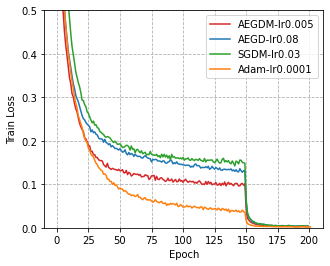

In [13]:
plot(pretrained=True, dataset='cifar10', model='vgg16', optim='', curve_type='train_loss', ylim=[0,0.5])

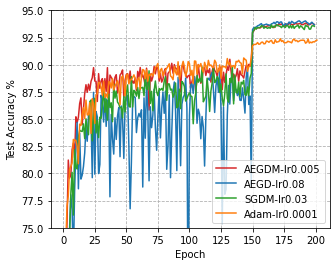

In [14]:
plot(pretrained=True, dataset='cifar10', model='vgg16', optim='', curve_type='test_acc', ylim=[75,95])

## ResNet32

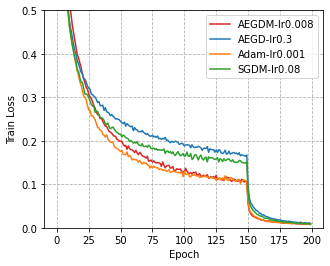

In [15]:
plot(pretrained=True, dataset='cifar10', model='resnet32', optim='', curve_type='train_loss', ylim=[0,0.5])

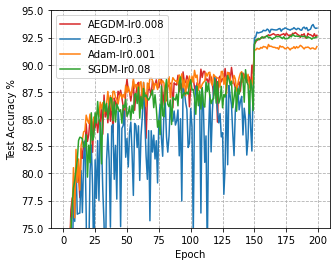

In [16]:
plot(pretrained=True, dataset='cifar10', model='resnet32', optim='', curve_type='test_acc', ylim=[75,95])


## ResNet56

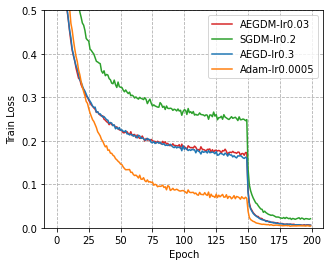

In [17]:
plot(pretrained=True, dataset='cifar10', model='resnet56', curve_type='train_loss', ylim=[0,0.5])

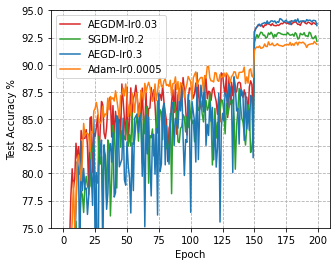

In [18]:
plot(pretrained=True, dataset='cifar10', model='resnet56', curve_type='test_acc', ylim=[75,95])

## Densenet121

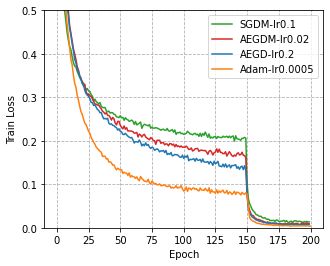

In [19]:
plot(pretrained=True, dataset='cifar10', model='densenetbc12', curve_type='train_loss', ylim=[0,0.5])

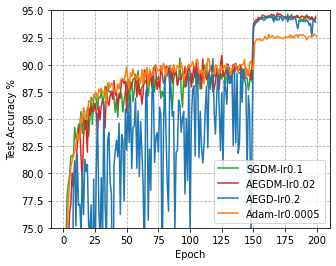

In [20]:
plot(pretrained=True, dataset='cifar10', model='densenetbc12', curve_type='test_acc', ylim=[75,95])

## SqueezNet

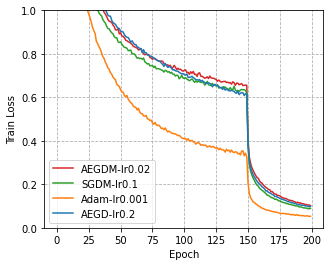

In [21]:
plot(pretrained=True, dataset='cifar100', model='squeezenet', curve_type='train_loss', ylim=[0,1])

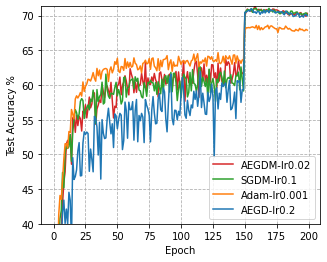

In [22]:
plot(pretrained=True, dataset='cifar100', model='squeezenet', curve_type='test_acc', ylim=[40,71.33])

## Googlenet

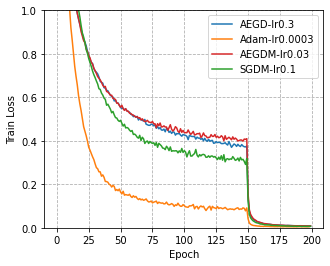

In [23]:
plot(pretrained=True, dataset='cifar100', model='googlenet', curve_type='train_loss', ylim=[0,1])

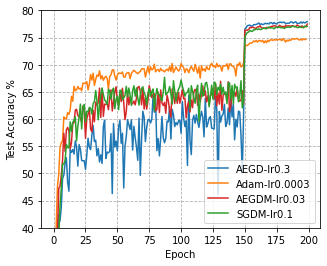

In [24]:
plot(pretrained=True, dataset='cifar100', model='googlenet', curve_type='test_acc', ylim=[40,80])